In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#Explore the Data
#There seems to be six countries, Chile, China, Germany, Mexico, US and Zimbabwe

In [6]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [7]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [ ]:
#Cleaning Column Name

In [14]:
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [ ]:
#Exploratory Plots

<Figure size 576x432 with 0 Axes>

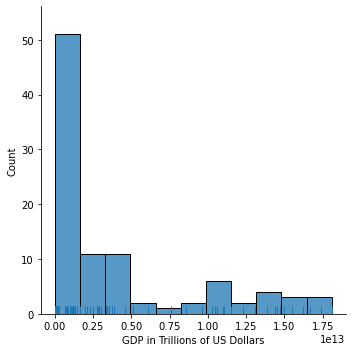

In [12]:
plt.figure(figsize=(8,6))
sns.displot(df.GDP, rug = True, kde=False)
plt.xlabel("GDP in Trillions of US Dollars");

In [ ]:
# The distribution of LEABY was examined.

<Figure size 576x432 with 0 Axes>

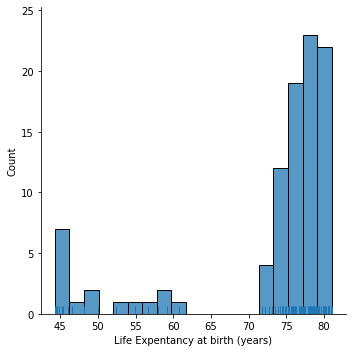

In [15]:
plt.figure(figsize=(8,6))
sns.displot(df.LEABY, rug=True, kde=False)
plt.xlabel("Life Expentancy at birth (years)");

In [16]:
dfMeans = df.drop("Year", axis=1).groupby("Country").mean().reset_index()
dfMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


In [ ]:
# After finding the LEABY and GDP of the country, barplot showing each mean values were created

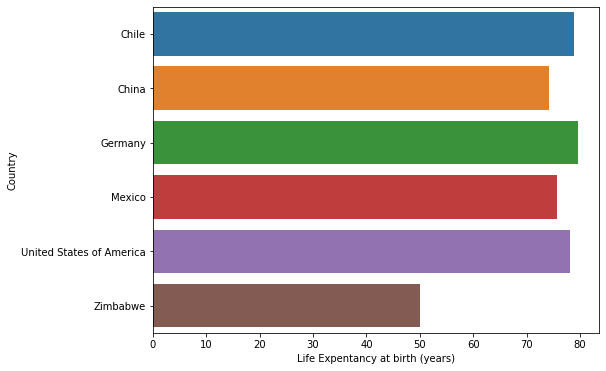

In [17]:
plt.figure(figsize=(8,6))
sns.barplot(x="LEABY", y="Country", data=dfMeans)
plt.xlabel("Life Expentancy at birth (years)");

In [ ]:
#Zimbabwe life expentacy is lower than the 4 countries, hence explaining the skew earlier.

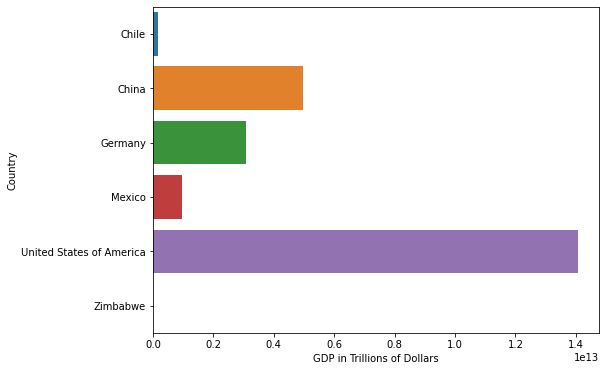

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=dfMeans)
plt.xlabel("GDP in Trillions of Dollars");

In [ ]:
#USA has higher value of GDP compared to the rest of the countries.
#China followed second in terms of GDP.

In [ ]:
#Violinplot to visualise data more.
#violinplot can show the shape of the data compared to boxplot.

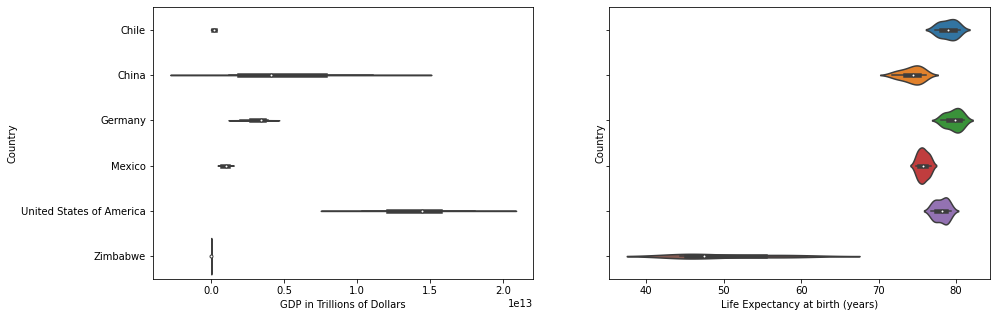

In [19]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(15,5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Life Expectancy at birth (years)");

In [ ]:
#On the left (GDP plot), China and USA has a wide range of GDP.
#On the right (LEABY plot), many of the countries has short range of life expectancy expect for Zimbabwe.

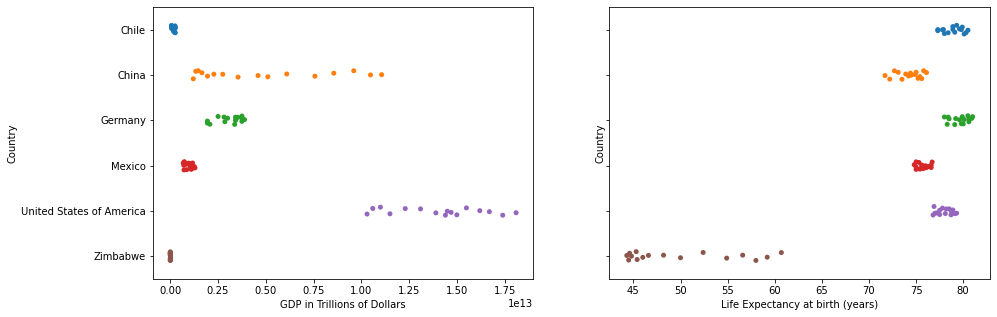

In [21]:
#Stripplot
fig, axes = plt.subplots(1,2, sharey=True, figsize=(15,5))
axes[0] = sns.stripplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of Dollars")
axes[1] = sns.stripplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Life Expectancy at birth (years)");

In [ ]:
#Stripplot is useful because they show the dot density around the values as well as distribution through area/shape.
#On the left, Zimbabwe and Chile has a vertical density plot. This detail would have lost in the box plot.

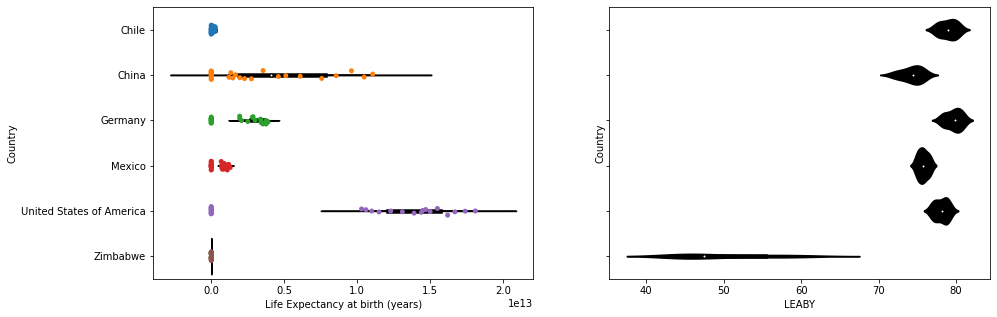

In [22]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(15,5))
axes[0] =sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country, color = "black")
axes[0] = sns.stripplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country, color = "black")
axes[1] = sns.stripplot(ax=axes[0], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Life Expectancy at birth (years)");

In [ ]:
#Line Chart

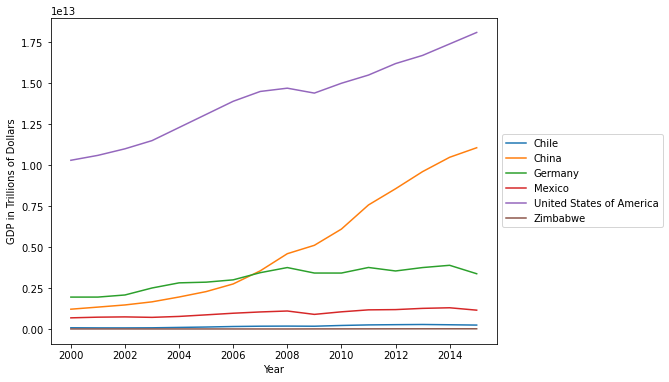

In [23]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc="center left", bbox_to_anchor=(1,0.5), ncol=1)
plt.ylabel("GDP in Trillions of Dollars");

In [ ]:
#We will explore GDP and LEABY over the years through line chart.
#Countries are separated by color. We can see that US and China has received substantial gain between the year 2000-2015.
#The rest of the countries remain constant throughout the year.

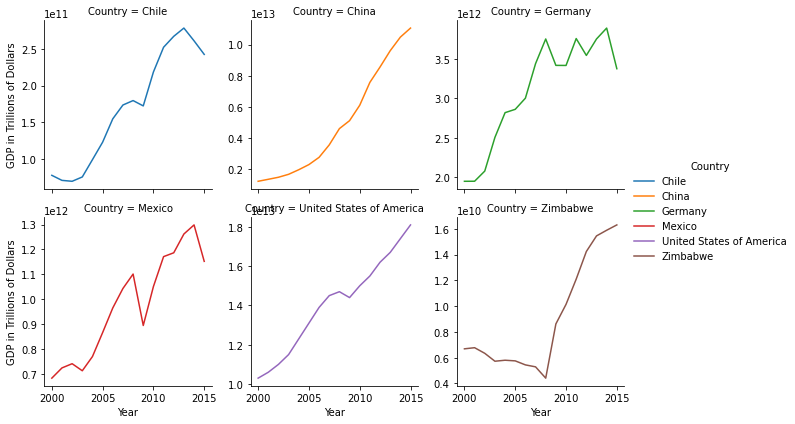

In [24]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3, hue="Country", sharey=False)
graphGDP = (graphGDP.map(sns.lineplot, "Year", "GDP").add_legend().set_axis_labels("Year", "GDP in Trillions of Dollars"))
graphGDP;

In [ ]:
#Faceted the line chart by countries.
#Makes it easier to see the data more comprehensive.
#Each countries did experience growth of GDP through the years. However, graph above cannot be seen clearly.

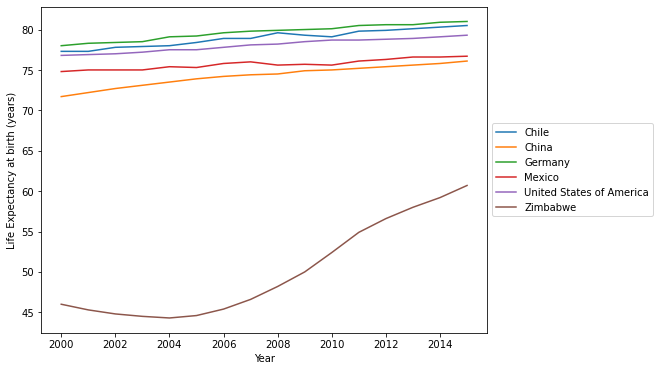

In [25]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(loc="center left", bbox_to_anchor=(1,0.5), ncol=1)
plt.ylabel("Life Expectancy at birth (years)");

In [ ]:
#The chart above shows the life expectancy of the countries over the years.
#The chart shows there's an increase for each countries, but Zimbabwe experienced a greater major growth in terms of life expectancy.

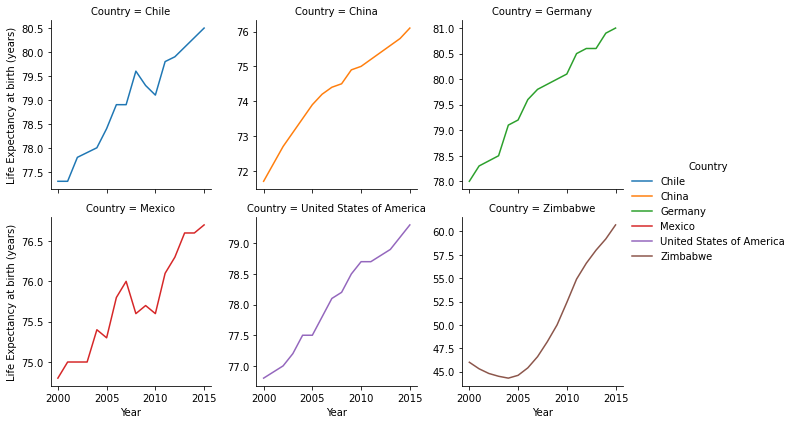

In [26]:
graphLEABY = sns.FacetGrid(df, col = "Country", col_wrap=3, hue="Country", sharey=False)
graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY").add_legend().set_axis_labels("Year","Life Expectancy at birth (years)"))
graphLEABY;

In [ ]:
#The same one as the above, we split the LEABY each of the countries to make it more clearer.
#Chile and Mexico experienced a growth in LEABY.

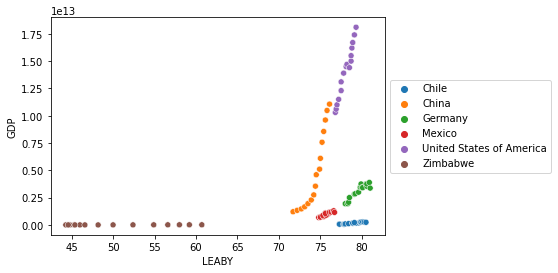

In [29]:
#Scatterplot
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

In [ ]:
#We compared the countries GDP against LEABY
#GDP for Zimbabwe staying flat, but there's increased in life expectancy.
#US and China have similar relationship in terms of GDP and life expectancy.

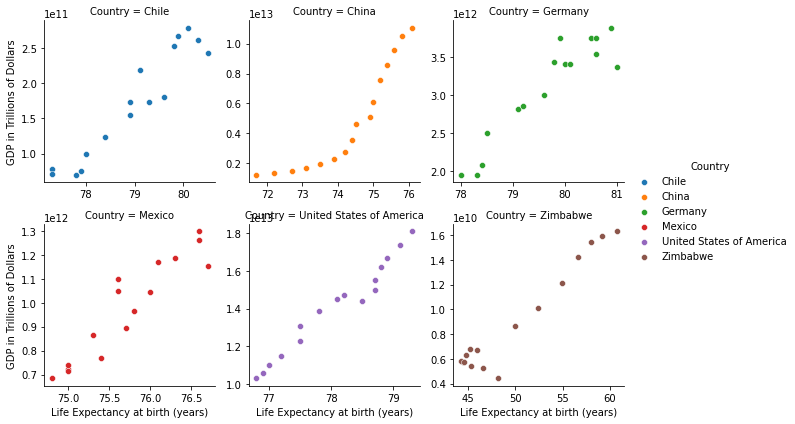

In [30]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3, hue="Country", sharey=False, sharex=False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP").add_legend().set_axis_labels("Life Expectancy at birth (years)", "GDP in Trillions of Dollars"));

In [ ]:
#In general, we can see that USA and China has linear relationship (GDP against LEABY).
#SLight decrease in Chile.
#Conclusion, we can see an increase in GDP and LEABY, exhibiting positive correlation.

In [ ]:
#Conclusion

#This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns.

#The project was also able to answer some of the questions posed in the beginning:

#Has life expectancy increased over time in the six nations?
#Yes with Zimbabwe having the greatest increase.

#Has GDP increased over time in the six nations?
#GDP has also increased for all countries in our list, especially for China.

#Is there a correlation between GDP and life expectancy of a country?
#Yes there is a positive correlation between GDP and life expectancy for countries in our list.

#What is the average life expectancy in these nations?
#Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.

#What is the distribution of that life expectancy?
#the life expectancy had a left skew, or most of the observations were on the right side.